**Question 1:** How much energy is produced in the United States? What resources provide energy and how has their contribution to total energy production changed over time?

In [36]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import os

In [37]:
# Declare request_urls

# fossil_coal_url created using API request generator 'cause it didn't generate url at first, but sent me to api url generator, so I chose 4 facets from list, figuring, well, maybe the monthly api url from clicking key on graph isn't working.
fossil_coal_url = "https://api.eia.gov/v2/total-energy/data/?frequency=monthly&data[0]=value&facets[msn][]=CLCASUS&facets[msn][]=CLEGPUS&facets[msn][]=CLERDUS&facets[msn][]=CLETPUS&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"

# fossil_petroleum_url = "https://api.eia.gov/v2/electricity/petroleum-electricity-consumption/data/"
# fossil_natgas_url = "https://api.eia.gov/v2/electricity/natural-gas-electricity-consumption/data/"
# fossil_othergas_url = "https://api.eia.gov/v2/electricity/other-gas-electricity-consumption/data/"
# renew_conventional_hydro_url = "https://api.eia.gov/v2/electricity/conventional-hydroelectric-electricity-consumption/data/"
# renew_biomass_wood_url = "https://api.eia.gov/v2/electricity/biomass-wood-electricity-consumption/data/"
# renew_biomass_waste_url = "https://api.eia.gov/v2/electricity/biomass-waste-electricity-consumption/data/"
# renew_geothermal_url = "https://api.eia.gov/v2/electricity/geothermal-electricity-consumption/data/"
# renew_solar_url = "https://api.eia.gov/v2/electricity/solar-electricity-consumption/data/"

# renew_win_url created by clicking monthly key on total energy chart. On this one, site returned the url.
renew_wind_url = "https://api.eia.gov/v2/total-energy/data/?frequency=monthly&data[0]=value&facets[msn][]=WYETPUS&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
# nuclear_url = "https://api.eia.gov/v2/electricity/nuclear-electricity-consumption/data/"
# hydro_pumped_storage_url = "https://api.eia.gov/v2/electricity/hydro-electricity-consumption/data/"
# total_energy_all_sources_url = "https://api.eia.gov/v2/total-energy/data/?frequency=monthly&data[0]=value&facets[msn][]=WYETPUS&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"

# Set team_key to Michael's API key
team_key = "?api_key=VncsPCILhy2WlSElUxu9SmixaOdqw9gZMobZ5uz9&"

# his returns 403 code
fossil_coal_url = fossil_coal_url + team_key
# this returns 403 code
renew_wind_url = renew_wind_url + team_key

# print(fossil_coal_url)
# type(fossil_coal_url)
print(renew_wind_url)

# url Michael via Slack - this returns 200 code
# eia_url = "https://api.eia.gov/v2/electricity/electric-power-operational-data/?api_key=VncsPCILhy2WlSElUxu9SmixaOdqw9gZMobZ5uz9&"



https://api.eia.gov/v2/total-energy/data/?frequency=monthly&data[0]=value&facets[msn][]=WYETPUS&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000?api_key=VncsPCILhy2WlSElUxu9SmixaOdqw9gZMobZ5uz9&


In [38]:
# Execute "GET" request with url
response_data = requests.get(renew_wind_url)

# Print "response_data" variable
print(response_data)

# Execute "GET" request with url
response_data = requests.get(eia_url)

# Print "response_data" variable
print(response_data)



<Response [403]>
<Response [200]>


In [ ]:
# Store response using "content" attribute
response_content = response_data.content

In [ ]:
# Format data as JSON
data = response_data.json()

In [ ]:
# Use json.dumps with argument indent=4 to format data
print(json.dumps(data, indent=4))

# Michael's code below:

In [ ]:
# Load in csv
ep_df = pd.read_csv("C:/Users/mford.MSBIOWORKS/Project_1/MER_T01_02.csv")
# print(monthly_energy_production_df)
ep_df.head(5)

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLPRBUS,194913,11.973882,1,Coal Production,Quadrillion Btu
1,CLPRBUS,195013,14.060135,1,Coal Production,Quadrillion Btu
2,CLPRBUS,195113,14.419325,1,Coal Production,Quadrillion Btu
3,CLPRBUS,195213,12.734313,1,Coal Production,Quadrillion Btu
4,CLPRBUS,195313,12.277746,1,Coal Production,Quadrillion Btu


In [ ]:
# Convert date to string
ep_df["YYYYMM"] = ep_df["YYYYMM"].astype(str)
ep_df.head(5)

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLPRBUS,194913,11.973882,1,Coal Production,Quadrillion Btu
1,CLPRBUS,195013,14.060135,1,Coal Production,Quadrillion Btu
2,CLPRBUS,195113,14.419325,1,Coal Production,Quadrillion Btu
3,CLPRBUS,195213,12.734313,1,Coal Production,Quadrillion Btu
4,CLPRBUS,195313,12.277746,1,Coal Production,Quadrillion Btu


In [ ]:
data_types = ep_df.dtypes
print(data_types)

MSN             object
YYYYMM          object
Value           object
Column_Order     int64
Description     object
Unit            object
dtype: object


In [ ]:
# filter to contain only MM = 13 values
annual_sum_ep_df = ep_df[ep_df['YYYYMM'].str[-2:] == "13"]
annual_sum_ep_df.head(5)

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLPRBUS,194913,11.973882,1,Coal Production,Quadrillion Btu
1,CLPRBUS,195013,14.060135,1,Coal Production,Quadrillion Btu
2,CLPRBUS,195113,14.419325,1,Coal Production,Quadrillion Btu
3,CLPRBUS,195213,12.734313,1,Coal Production,Quadrillion Btu
4,CLPRBUS,195313,12.277746,1,Coal Production,Quadrillion Btu


In [ ]:
#Reformat date

# Create a copy of the original DataFrame
filtered_annual_ep_df = annual_sum_ep_df.copy()

# Reformat date
filtered_annual_ep_df['Year'] = annual_sum_ep_df['YYYYMM'].str[:4]

# Drop the 'YYYYMM' column
filtered_annual_ep_df = filtered_annual_ep_df.drop(columns=['YYYYMM'])

# Display the modified DataFrame
filtered_annual_ep_df.head()

,MSN,Value,Column_Order,Description,Unit,Year
0,CLPRBUS,11.973882,1,Coal Production,Quadrillion Btu,1949
1,CLPRBUS,14.060135,1,Coal Production,Quadrillion Btu,1950
2,CLPRBUS,14.419325,1,Coal Production,Quadrillion Btu,1951
3,CLPRBUS,12.734313,1,Coal Production,Quadrillion Btu,1952
4,CLPRBUS,12.277746,1,Coal Production,Quadrillion Btu,1953


In [ ]:
#View entries in Description
unique_descriptions = filtered_annual_ep_df["Description"].unique()
print(unique_descriptions)


['Coal Production' 'Natural Gas (Dry) Production' 'Crude Oil Production'
 'Natural Gas Plant Liquids Production' 'Total Fossil Fuels Production'
 'Nuclear Electric Power Production' 'Hydroelectric Power Production'
 'Geothermal Energy Production' 'Solar Energy Production'
 'Wind Energy Production' 'Biomass Energy Production'
 'Total Renewable Energy Production' 'Total Primary Energy Production']


In [ ]:
# Assuming 'your_column' is the name of the column you want to convert to numeric
filtered_annual_ep_df['Value'] = pd.to_numeric(filtered_annual_ep_df['Value'], errors='coerce')

In [ ]:
transposed_df = filtered_annual_ep_df.pivot(index='Description', columns='Year', values='Value')
transposed_df = transposed_df.reset_index()
transposed_df.columns.name = None


In [ ]:
transposed_df.head(10)

,Description,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Biomass Energy Production,1.549262,1.562307,1.534669,1.474369,1.418601,1.394327,1.424143,1.415871,1.333581,...,4.834795,5.052100,5.031349,5.131757,5.165713,5.314147,5.215002,4.709773,4.913616,5.073211
1,Coal Production,11.973882,14.060135,14.419325,12.734313,12.277746,10.542448,12.369608,13.306334,13.061393,...,20.001304,20.285705,17.946095,14.667089,15.625377,15.363442,14.255763,10.703214,11.596284,12.043193
2,Crude Oil Production,10.683252,11.446729,13.036724,13.281049,13.671076,13.426930,14.409682,15.180241,15.178026,...,15.867760,18.610131,19.697310,18.526662,19.546610,22.807907,25.604215,23.574988,23.401382,24.710492
3,Geothermal Energy Production,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.117323,0.117672,0.117811,0.117498,0.117842,0.117980,0.116293,0.117716,0.118007,0.118389
4,Hydroelectric Power Production,0.323365,0.344218,0.356131,0.374325,0.374015,0.380915,0.396597,0.427307,0.455017,...,0.916345,0.884959,0.849861,0.913775,1.024736,0.998092,0.982225,0.973355,0.858407,0.869339
5,Natural Gas (Dry) Production,5.377243,6.232975,7.415733,7.963599,8.338838,8.681785,9.344668,10.002147,10.605254,...,24.859072,26.718073,28.066882,27.576023,28.289335,31.882148,35.187183,35.062141,35.806859,37.661732
6,Natural Gas Plant Liquids Production,0.706102,0.813366,0.910336,0.985701,1.050702,1.101065,1.222838,1.264288,1.273767,...,3.451386,4.005085,4.475993,4.664785,4.987096,5.726973,6.351729,6.804761,7.098605,7.741902
7,Nuclear Electric Power Production,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000112,...,8.244433,8.337559,8.336886,8.426753,8.418968,8.438068,8.451852,8.251075,8.130913,8.061020
8,Solar Energy Production,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.119650,0.161050,0.196175,0.250888,0.328623,0.383634,0.429747,0.511315,0.626863,0.764580
9,Total Fossil Fuels Production,28.740479,32.553205,35.782118,34.964662,35.338361,33.752228,37.346797,39.753010,40.118440,...,64.179522,69.618994,70.186279,65.434559,68.448418,75.780470,81.398890,76.145104,77.903130,82.157318


In [ ]:
data_types = transposed_df.dtypes
print(data_types)

Description     object
1949           float64
1950           float64
1951           float64
1952           float64
                ...   
2018           float64
2019           float64
2020           float64
2021           float64
2022           float64
Length: 75, dtype: object


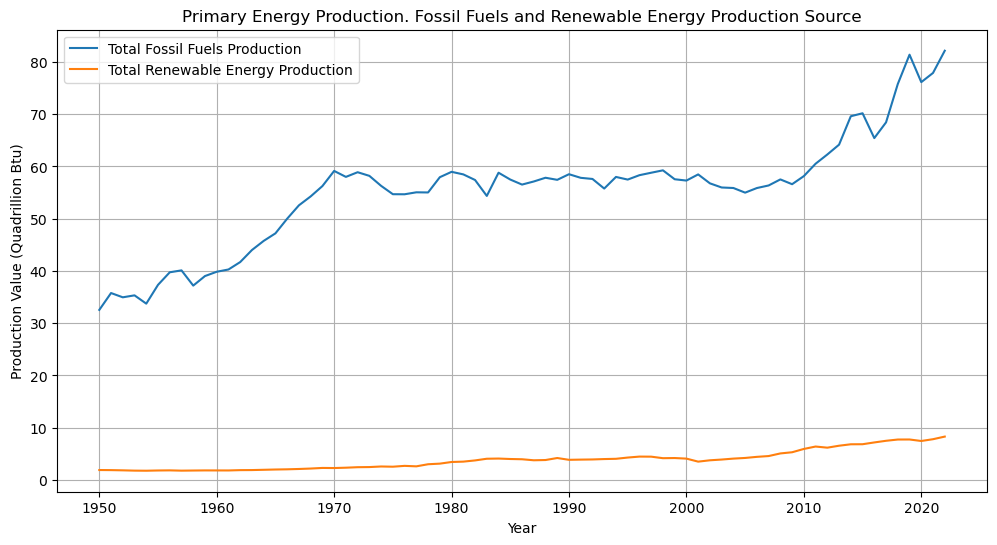

In [ ]:
# Select the row with index 0 and Description "Coal Production"
# Filter the DataFrame for each type of production
total_fossil_fuel_row = transposed_df[(transposed_df.index == 9) & (transposed_df['Description'] == 'Total Fossil Fuels Production')]
renewable_energy_row = transposed_df[(transposed_df.index == 11) & (transposed_df['Description'] == 'Total Renewable Energy Production')]


# Extract the years and values for each production type
years = coal_production_row.columns[2:].astype(int)
fossil_fuel_values = total_fossil_fuel_row.values[:, 2:].flatten().astype(float)
renewable_energy_values = renewable_energy_row.values[:, 2:].flatten().astype(float)

# Create a line plot for each production type
plt.figure(figsize=(12, 6))
plt.plot(years, fossil_fuel_values, linestyle='-', label='Total Fossil Fuels Production')
plt.plot(years, renewable_energy_values, linestyle='-', label='Total Renewable Energy Production')
plt.title("Primary Energy Production. Fossil Fuels and Renewable Energy Production Source")
plt.xlabel("Year")
plt.ylabel("Production Value (Quadrillion Btu)")
plt.grid(True)
plt.legend()
plt.show()

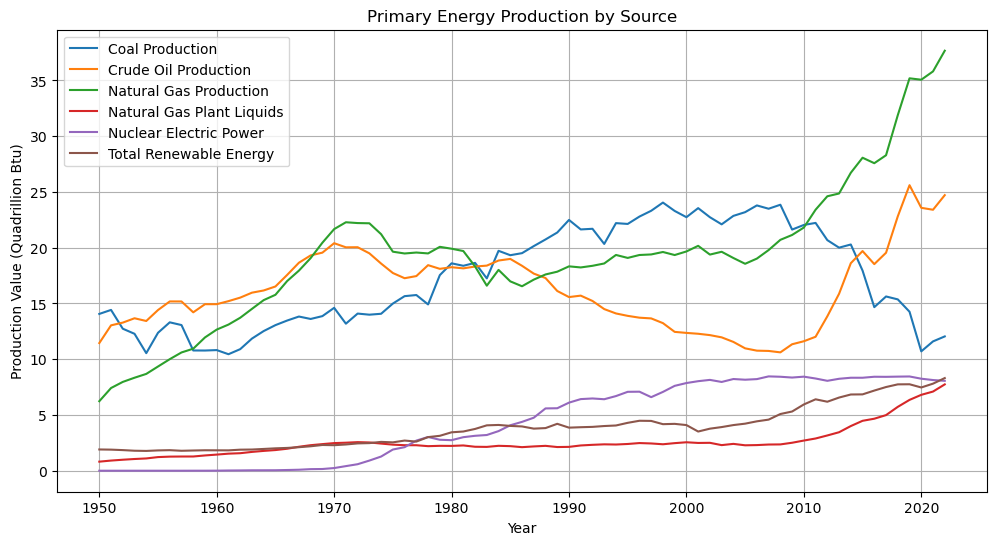

In [ ]:
# Select the row with index 0 and Description "Coal Production"
# Filter the DataFrame for each type of production
coal_production_row = transposed_df[(transposed_df.index == 1) & (transposed_df['Description'] == 'Coal Production')]
crude_oil_production_row = transposed_df[(transposed_df.index == 2) & (transposed_df['Description'] == 'Crude Oil Production')]
natural_gas_production_row = transposed_df[(transposed_df.index == 5) & (transposed_df['Description'] == 'Natural Gas (Dry) Production')]
natural_gas_liquids_row = transposed_df[(transposed_df.index == 6) & (transposed_df['Description'] == 'Natural Gas Plant Liquids Production')]
nuclear_power_row = transposed_df[(transposed_df.index == 7) & (transposed_df['Description'] == 'Nuclear Electric Power Production')]
renewable_energy_row = transposed_df[(transposed_df.index == 11) & (transposed_df['Description'] == 'Total Renewable Energy Production')]

# Extract the years and values for each production type
years = coal_production_row.columns[2:].astype(int)
coal_values = coal_production_row.values[:, 2:].flatten().astype(float)
crude_oil_values = crude_oil_production_row.values[:, 2:].flatten().astype(float)
natural_gas_values = natural_gas_production_row.values[:, 2:].flatten().astype(float)
natural_gas_liquids_values = natural_gas_liquids_row.values[:, 2:].flatten().astype(float)
nuclear_power_values = nuclear_power_row.values[:, 2:].flatten().astype(float)
renewable_energy_values = renewable_energy_row.values[:, 2:].flatten().astype(float)

# Create a line plot for each production type
plt.figure(figsize=(12, 6))
plt.plot(years, coal_values, linestyle='-', label='Coal Production')
plt.plot(years, crude_oil_values, linestyle='-', label='Crude Oil Production')
plt.plot(years, natural_gas_values, linestyle='-', label='Natural Gas Production')
plt.plot(years, natural_gas_liquids_values, linestyle='-', label='Natural Gas Plant Liquids')
plt.plot(years, nuclear_power_values, linestyle='-', label='Nuclear Electric Power')
plt.plot(years, renewable_energy_values, linestyle='-', label='Total Renewable Energy')
plt.title("Primary Energy Production by Source")
plt.xlabel("Year")
plt.ylabel("Production Value (Quadrillion Btu)")
plt.grid(True)
plt.legend()
plt.show()


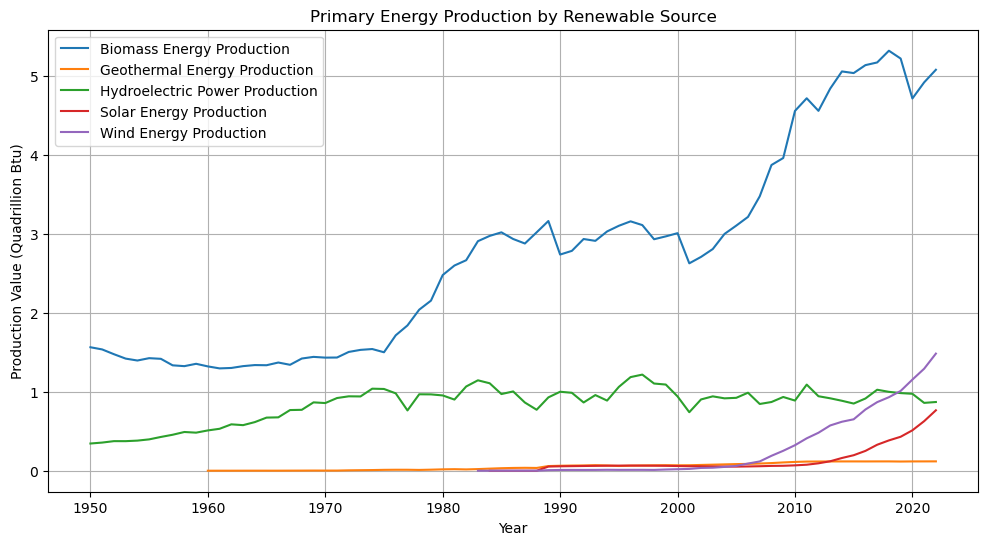

In [ ]:
# Select the row with index 0 and Description "Coal Production"
# Filter the DataFrame for each type of production
Biomass_Energy_Production_row = transposed_df[(transposed_df.index == 0) & (transposed_df['Description'] == 'Biomass Energy Production')]
Geothermal_Energy_Production_row = transposed_df[(transposed_df.index == 3) & (transposed_df['Description'] == 'Geothermal Energy Production')]
Hydroelectric_Power_Production_row = transposed_df[(transposed_df.index == 4) & (transposed_df['Description'] == 'Hydroelectric Power Production')]
Solar_Energy_Production_row = transposed_df[(transposed_df.index == 8) & (transposed_df['Description'] == 'Solar Energy Production')]
Wind_Energy_Production_row = transposed_df[(transposed_df.index == 12) & (transposed_df['Description'] == 'Wind Energy Production')]


# Extract the years and values for each production type
years = Biomass_Energy_Production_row.columns[2:].astype(int)
Biomass_values = Biomass_Energy_Production_row.values[:, 2:].flatten().astype(float)
Geothermal_values = Geothermal_Energy_Production_row.values[:, 2:].flatten().astype(float)
Hydroelectric_values = Hydroelectric_Power_Production_row.values[:, 2:].flatten().astype(float)
Solar_values = Solar_Energy_Production_row.values[:, 2:].flatten().astype(float)
Wind_values = Wind_Energy_Production_row.values[:, 2:].flatten().astype(float)

# Create a line plot for each production type
plt.figure(figsize=(12, 6))
plt.plot(years, Biomass_values, linestyle='-', label='Biomass Energy Production')
plt.plot(years, Geothermal_values, linestyle='-', label='Geothermal Energy Production')
plt.plot(years, Hydroelectric_values, linestyle='-', label='Hydroelectric Power Production')
plt.plot(years, Solar_values, linestyle='-', label='Solar Energy Production')
plt.plot(years, Wind_values, linestyle='-', label='Wind Energy Production')
plt.title("Primary Energy Production by Renewable Source")
plt.xlabel("Year")
plt.ylabel("Production Value (Quadrillion Btu)")
plt.grid(True)
plt.legend()
plt.show()

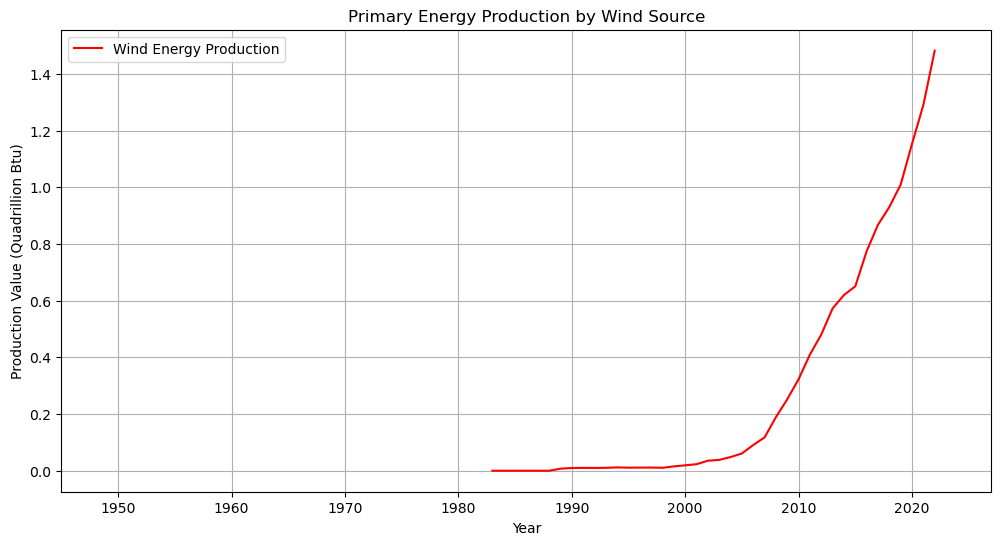

In [ ]:
# Select the row with index 0 and Description "Coal Production"
# Filter the DataFrame for each type of production
Wind_Energy_Production_row = transposed_df[(transposed_df.index == 12) & (transposed_df['Description'] == 'Wind Energy Production')]


# Extract the years and values for each production type
years = Biomass_Energy_Production_row.columns[2:].astype(int)
Wind_values = Wind_Energy_Production_row.values[:, 2:].flatten().astype(float)

# Create a line plot for each production type
plt.figure(figsize=(12, 6))
plt.plot(years, Wind_values, linestyle='-', color='r', label='Wind Energy Production')
plt.title("Primary Energy Production by Wind Source")
plt.xlabel("Year")
plt.ylabel("Production Value (Quadrillion Btu)")
plt.grid(True)
plt.legend()

# Extend the x-axis by adding extra space on both ends
plt.xlim(years[0] - 5, years[-1] + 5)  # Adjust the numbers to control the extension

plt.show()

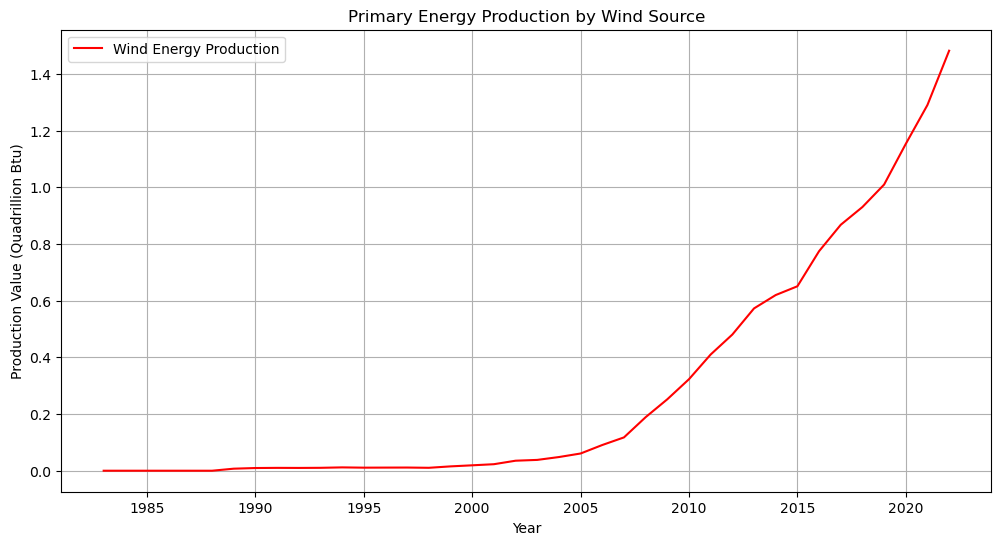

In [ ]:
# Select the row with index 0 and Description "Coal Production"
# Filter the DataFrame for each type of production
Wind_Energy_Production_row = transposed_df[(transposed_df.index == 12) & (transposed_df['Description'] == 'Wind Energy Production')]


# Extract the years and values for each production type
years = Biomass_Energy_Production_row.columns[2:].astype(int)
Wind_values = Wind_Energy_Production_row.values[:, 2:].flatten().astype(float)

# Create a line plot for each production type
plt.figure(figsize=(12, 6))
plt.plot(years, Wind_values, linestyle='-', color='r', label='Wind Energy Production')
plt.title("Primary Energy Production by Wind Source")
plt.xlabel("Year")
plt.ylabel("Production Value (Quadrillion Btu)")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# W_columns = transposed_df[['Column1', 'Column2']]  # Select 'Column1' and 'Column2'
# selected_columns.to_csv('selected_columns.csv', index=False)


In [ ]:
modeling_wind_data = filtered_annual_ep_df[filtered_annual_ep_df['Description'] == 'Wind Energy Production']

In [ ]:
modeling_wind_data.head(5)

,MSN,Value,Column_Order,Description,Unit,Year
6147,WYTCBUS,NaN,10,Wind Energy Production,Quadrillion Btu,1949
6148,WYTCBUS,NaN,10,Wind Energy Production,Quadrillion Btu,1950
6149,WYTCBUS,NaN,10,Wind Energy Production,Quadrillion Btu,1951
6150,WYTCBUS,NaN,10,Wind Energy Production,Quadrillion Btu,1952
6151,WYTCBUS,NaN,10,Wind Energy Production,Quadrillion Btu,1953


In [ ]:
# Remove rows with NaN values in the 'Value' column
modeling_wind_data_cleaned = modeling_wind_data.dropna(subset=['Value'])


In [ ]:
modeling_wind_data_cleaned.head(5)

,MSN,Value,Column_Order,Description,Unit,Year
6313,WYTCBUS,0.000009,10,Wind Energy Production,Quadrillion Btu,1983
6326,WYTCBUS,0.000022,10,Wind Energy Production,Quadrillion Btu,1984
6339,WYTCBUS,0.000020,10,Wind Energy Production,Quadrillion Btu,1985
6352,WYTCBUS,0.000014,10,Wind Energy Production,Quadrillion Btu,1986
6365,WYTCBUS,0.000012,10,Wind Energy Production,Quadrillion Btu,1987


In [ ]:
modeling_wind_data_cleaned = modeling_wind_data_cleaned[['Year', 'Value']]  # Select 'Column1' and 'Column2'
modeling_wind_data_cleaned.to_csv('modeling_wing_export.csv', index=False)

In [ ]:
# Load in csv
Prophet_model = pd.read_csv("C:/Users/mford.MSBIOWORKS/Project_1/prophet_wind_data.csv")
# print(monthly_energy_production_df)
Prophet_model.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1983-01-01,-0.006848,-0.574890,-0.033034,-0.006848,-0.006848,-0.297480,-0.297480,-0.297480,-0.297480,-0.297480,-0.297480,0.0,0.0,0.0,-0.304329
1,1984-01-01,0.023344,-0.565653,-0.018069,0.023344,0.023344,-0.303884,-0.303884,-0.303884,-0.303884,-0.303884,-0.303884,0.0,0.0,0.0,-0.280540
2,1985-01-01,0.053619,-0.519937,0.039096,0.053619,0.053619,-0.284010,-0.284010,-0.284010,-0.284010,-0.284010,-0.284010,0.0,0.0,0.0,-0.230391
3,1986-01-01,0.083811,-0.475515,0.078659,0.083811,0.083811,-0.290853,-0.290853,-0.290853,-0.290853,-0.290853,-0.290853,0.0,0.0,0.0,-0.207042
4,1987-01-01,0.114003,-0.459029,0.090643,0.114003,0.114003,-0.297480,-0.297480,-0.297480,-0.297480,-0.297480,-0.297480,0.0,0.0,0.0,-0.183477


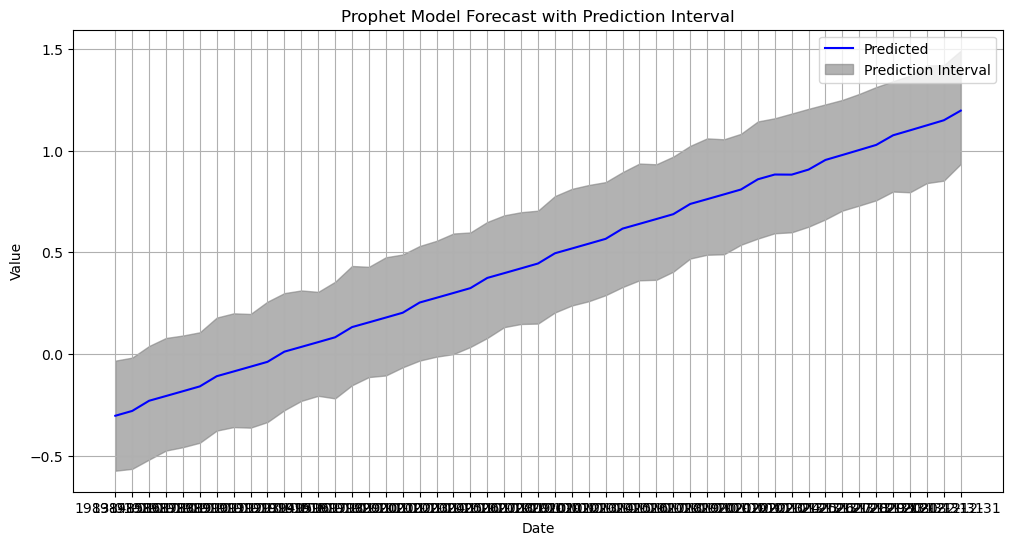

In [ ]:
ds = Prophet_model['ds']
yhat = Prophet_model['yhat']
yhat_lower = Prophet_model['yhat_lower']
yhat_upper = Prophet_model['yhat_upper']

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot 'ds' on the x-axis and 'yhat' on the y-axis
plt.plot(ds, yhat, label='Predicted', color='blue')

# Plot 'ds' on the x-axis and 'yhat_upper' and 'yhat_lower' as a shaded prediction interval
plt.fill_between(ds, yhat_lower, yhat_upper, color='gray', alpha=0.6, label='Prediction Interval')

# Customize the plot
plt.title('Prophet Model Forecast with Prediction Interval')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()